In [1]:
import anndata as ad
import crested
import numpy as np

2025-08-05 13:27:04.219351: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-05 13:27:04.231984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754425624.246459   31030 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754425624.250800   31030 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-05 13:27:04.265376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
import matplotlib
import matplotlib.pyplot as plt

# Set the font type to ensure text is saved as whole words
matplotlib.rcParams["pdf.fonttype"] = 42  # Use TrueType fonts instead of Type 3 fonts
matplotlib.rcParams["ps.fonttype"] = 42  # For PostScript as well, if needed

# Full universe, first training pass

In [14]:
bigwigs_folder = "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_inGMSTR/results/"
regions_file = "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_subGroup/results/whole_tax_merged_peaks.bed"
#regions_file = "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_inGMSTR/results/merged_peaks_astro_GMSTR_3clusters.bed"


In [8]:
import os

genome_fasta  = "/allen/programs/celltypes/workgroups/rnaseqanalysis/references/human/10x/grch38.p2/genome/fasta/genome.fa"

# if you ever need a .chrom.sizes (for change_regions_width etc)
chr_sizes     = os.path.abspath(
    os.path.join(os.path.dirname(genome_fasta), "../star/chrNameLength.txt")
)

genome = crested.Genome(
   genome_fasta, chr_sizes)

crested.register_genome(
    genome
)  # Register the genome so that it can be used by the package

print(genome.fetch("chr1", 10000, 10010))

2025-08-05T13:28:19.676398-0700 INFO Genome genome registered.
TAACCCTAAC


In [35]:
adata = crested.import_bigwigs(
    bigwigs_folder=bigwigs_folder,
    regions_file=regions_file,
    target_region_width=1000,
    target="count",
)
adata

2025-07-31T15:52:00.839191-0700 INFO Extracting values from 3 bigWig files...


AnnData object with n_obs × n_vars = 3 × 1360548
    obs: 'file_path'
    var: 'chr', 'start', 'end'

In [36]:
adata.X = np.nan_to_num(adata.X, nan=0.0)

In [37]:
# Choose the chromosomes for the validation and test sets
crested.pp.train_val_test_split(
    adata, strategy="chr", val_chroms=["chr10"], test_chroms=["chr18"]
)

print(adata.var["split"].value_counts())
adata.var.head(3)

split
train    1256391
val        67764
test       36393
Name: count, dtype: int64


chr   start     end  split
region                                                     
GL000009.2:114168-114669  GL000009.2  114168  114669  train
GL000009.2:115001-115502  GL000009.2  115001  115502  train
GL000194.1:7949-8450      GL000194.1    7949    8450  train

In [38]:
crested.pp.change_regions_width(
    adata,
    2114,
)  # change the adata width of the regions to 2114bp

2025-07-31T15:52:38.793120-0700 WARNING Region GL000194.1:189580-191694 with coordinates GL000194.1:189580-191694 is out of bounds for chromosome GL000194.1. Removing region.
2025-07-31T15:52:38.883148-0700 WARNING Region GL000205.2:-633-1480 with coordinates GL000205.2:-633-1480 is out of bounds for chromosome GL000205.2. Removing region.
2025-07-31T15:52:38.890122-0700 WARNING Region GL000219.1:177303-179417 with coordinates GL000219.1:177303-179417 is out of bounds for chromosome GL000219.1. Removing region.
2025-07-31T15:52:38.891377-0700 WARNING Region KI270711.1:40183-42297 with coordinates KI270711.1:40183-42297 is out of bounds for chromosome KI270711.1. Removing region.


In [39]:
adata.write_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_group_universe.h5ad")

# Filtered regions from cluster universe, second training pass

In [3]:
bigwigs_folder = "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_inGMSTR/results/"
regions_file = "/allen/programs/celltypes/workgroups/rnaseqanalysis/HMBA/Aim1_Atlases/BasalGanglia_paper_package/data/human/ATAC/Astro_inGMSTR/results/merged_peaks_astro_GMSTR_3clusters.bed"

In [54]:
adata = crested.import_bigwigs(
    bigwigs_folder=bigwigs_folder,
    regions_file=regions_file,
    target_region_width=1000,
    target="count",
)
adata

2025-07-31T16:04:03.203768-0700 INFO Extracting values from 3 bigWig files...


AnnData object with n_obs × n_vars = 3 × 320189
    obs: 'file_path'
    var: 'chr', 'start', 'end'

In [55]:
adata.X = np.nan_to_num(adata.X, nan=0.0)

In [56]:
# Choose the chromosomes for the validation and test sets
crested.pp.train_val_test_split(
    adata, strategy="chr", val_chroms=["chr10"], test_chroms=["chr18"]
)

print(adata.var["split"].value_counts())
adata.var.head(3)

split
train    295662
val       16908
test       7619
Name: count, dtype: int64


chr  start    end  split
region                                                 
GL000194.1:21905-22406  GL000194.1  21905  22406  train
GL000194.1:24960-25461  GL000194.1  24960  25461  train
GL000194.1:24260-24761  GL000194.1  24260  24761  train

In [57]:
crested.pp.change_regions_width(
    adata,
    2114,
)  # change the adata width of the regions to 2114bp

2025-07-31T16:04:16.063098-0700 WARNING Region GL000205.2:-609-1504 with coordinates GL000205.2:-609-1504 is out of bounds for chromosome GL000205.2. Removing region.
2025-07-31T16:04:16.067051-0700 WARNING Region GL000219.1:177696-179810 with coordinates GL000219.1:177696-179810 is out of bounds for chromosome GL000219.1. Removing region.
2025-07-31T16:04:16.067875-0700 WARNING Region GL000219.1:177190-179304 with coordinates GL000219.1:177190-179304 is out of bounds for chromosome GL000219.1. Removing region.


In [58]:
crested.pp.normalize_peaks(
    adata, top_k_percent=0.03
)  # The top_k_percent parameters can be tuned based on potential bias towards cell types. If some weights are overcompensating too much, consider increasing the top_k_percent. Default is 0.01

2025-07-31T16:04:32.602394-0700 INFO Filtering on top k Gini scores...
2025-07-31T16:04:33.083091-0700 INFO Added normalization weights to adata.obsm['weights']...


chr      start        end  split
region                                                      
chr15:39933026-39935140   chr15   39933026   39935140  train
chr4:158671628-158673742   chr4  158671628  158673742  train
chr2:131092419-131094533   chr2  131092419  131094533  train
chr15:40038161-40040275   chr15   40038161   40040275  train
chr4:158767838-158769952   chr4  158767838  158769952  train
...                         ...        ...        ...    ...
chr8:119872639-119874753   chr8  119872639  119874753  train
chr17:77450417-77452531   chr17   77450417   77452531  train
chr10:32345298-32347412   chr10   32345298   32347412    val
chr10:32346164-32348278   chr10   32346164   32348278    val
chr15:39770434-39772548   chr15   39770434   39772548  train

[6499 rows x 4 columns]

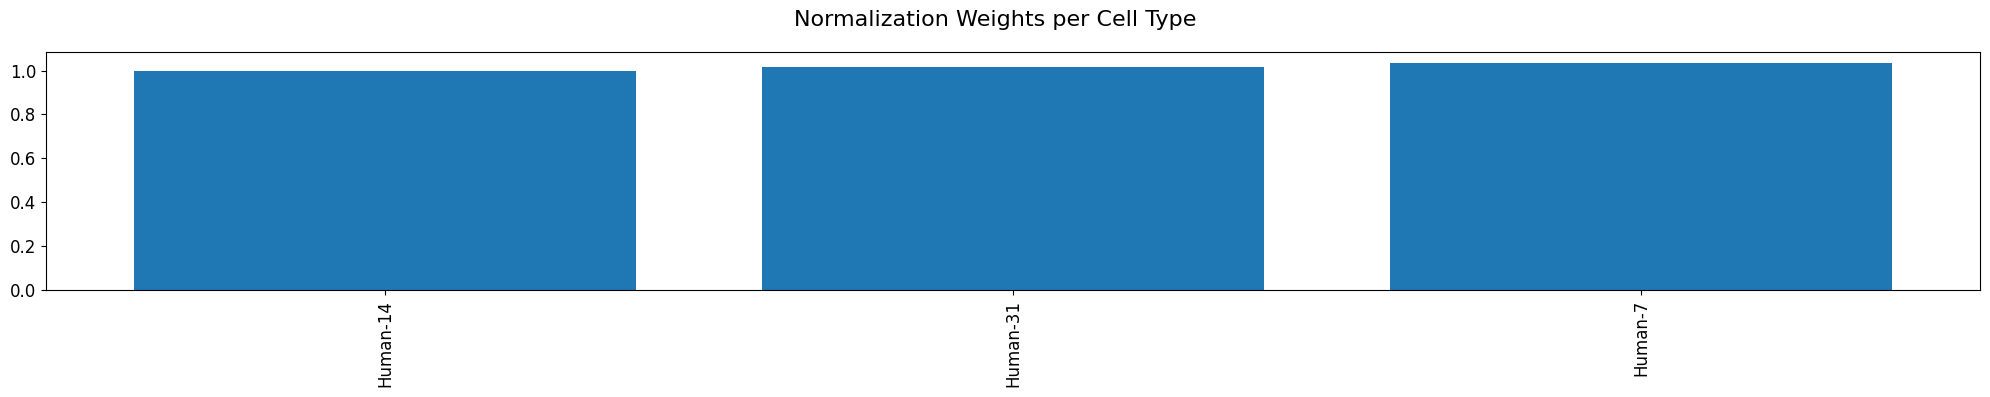

In [59]:
%matplotlib inline
crested.pl.bar.normalization_weights(
    adata, title="Normalization Weights per Cell Type", x_label_rotation=90, height=4
)

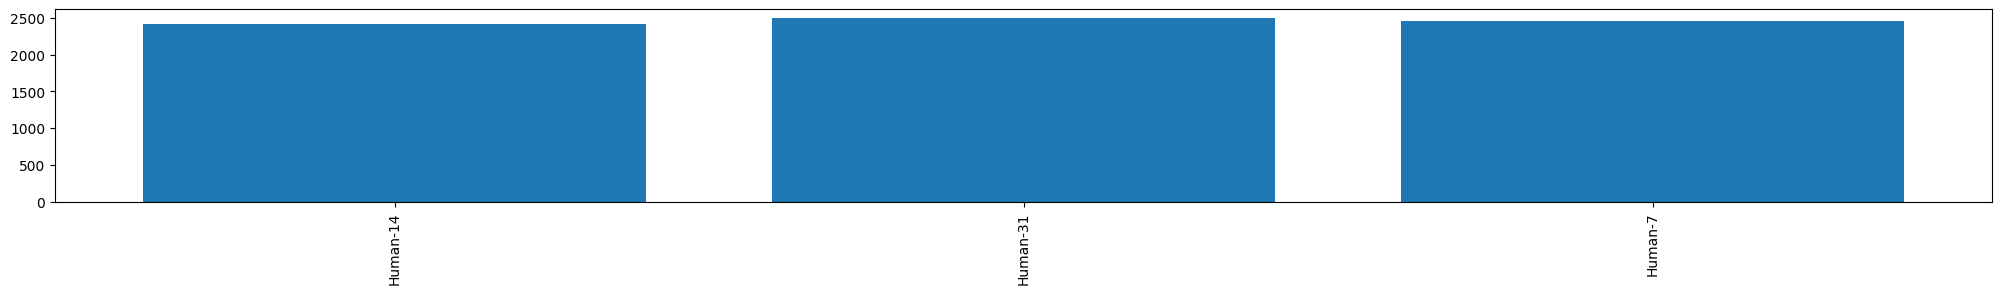

In [60]:
# Sanity checks
reg="chr2:131092419-131094533"	
idx = np.argwhere(adata.var.index==reg)[0,0]
plt.figure(figsize=(25,2.5))
plt.bar(adata.obs_names, adata.X.T[idx])
plt.xticks(rotation=90)
plt.show()

In [61]:
adata.write_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_cluster_subset.h5ad")

In [4]:
adata = ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_cluster_subset.h5ad")

In [5]:
crested.pp.filter_regions_on_specificity(
    adata, gini_std_threshold=0
)  # All regions with a Gini index 1 std above the mean across all regions will be kept
adata

2025-07-31T17:30:09.598417-0700 INFO After specificity filtering, kept 119773 out of 320186 regions.


AnnData object with n_obs × n_vars = 3 × 119773
    obs: 'file_path'
    var: 'chr', 'start', 'end', 'split'
    obsm: 'weights'

In [6]:
import pandas as pd
X = adata.X

# Transpose to (cell types, peaks)
X_T = X.T  # shape = (n_celltypes, n_regions)
cell_types = list(adata.var_names)  # 1 label per column

# Convert to long-form DataFrame
df = pd.DataFrame(X_T, index=cell_types)

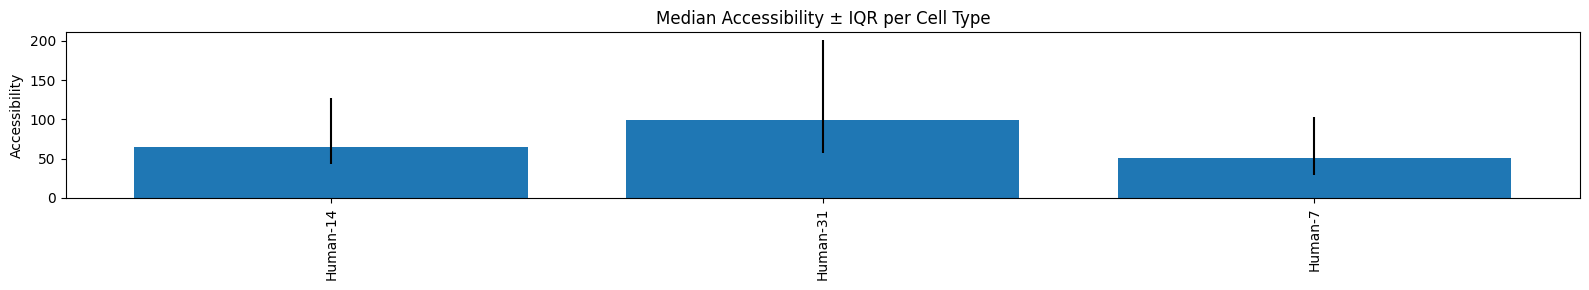

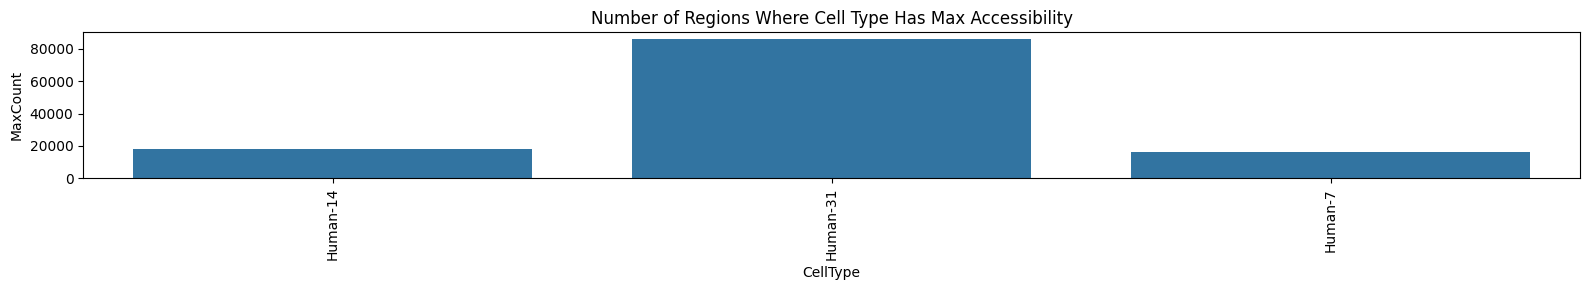

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse
%matplotlib inline

# Get the matrix and ensure it's dense
X = adata.X
if sparse.issparse(X):
    X = X.toarray()

# Transpose to (cell types, peaks)
X_T = X.T  # shape = (n_celltypes, n_regions)
cell_types = list(adata.obs_names)  # 1 label per column

# Convert to long-form DataFrame
df = pd.DataFrame(X_T, columns=cell_types)

medians = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

plt.figure(figsize=(16, 3))
plt.bar(cell_types, medians, yerr=[medians - q1, q3 - medians])
plt.xticks(rotation=90)
plt.ylabel("Accessibility")
plt.title("Median Accessibility ± IQR per Cell Type")
plt.tight_layout()
plt.show()

# --- Bar plot: how often each cell type is the most accessible per region ---
max_indices = X.T.argmax(axis=1)  # index of max cell type per region
max_counts = np.bincount(max_indices, minlength=len(cell_types))

bar_df = pd.DataFrame({
    'CellType': cell_types,
    'MaxCount': max_counts
})

plt.figure(figsize=(16, 3))
sns.barplot(data=bar_df, x='CellType', y='MaxCount')
plt.xticks(rotation=90)
plt.title("Number of Regions Where Cell Type Has Max Accessibility")
plt.tight_layout()
plt.show()

In [9]:
adata.write("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_cluster_subset_filtered.h5ad")

# Model eval

In [4]:
adata = ad.read_h5ad("/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/dorsal_ventral_dars.h5ad")

In [5]:
import keras
#model_path_tl= "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/dorsal_ventral_TL/12.keras"
#model_path_ft= "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/dorsal_ventral_FT_2/checkpoints/02.keras"
model_path_base = "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/cluster_full_universe_base/checkpoints/12.keras"
model_path_filtered = "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/cluster_full_universe_base_subset_filtered/checkpoints/02.keras"
model_path_filtered_dars = "/allen/programs/celltypes/workgroups/rnaseqanalysis/EvoGen/OCTO/aibs-octo-dnaseq-modeling/basal-ganglia/models/crested/astrocytes/astro/astro_human/cluster_full_universe_base_subset_filtered_dars/checkpoints/30.keras"

In [6]:
#model_tl = keras.models.load_model(model_path_tl, compile=False)
#model_ft = keras.models.load_model(model_path_ft, compile=False)
model_base = keras.models.load_model(model_path_base, compile=False)
model_filtered = keras.models.load_model(model_path_filtered, compile=False)
model_dars = keras.models.load_model(model_path_filtered_dars, compile=False)

I0000 00:00:1754425687.580143   31030 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38480 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [9]:
import pysam
from tqdm import tqdm
fasta = pysam.FastaFile(genome_fasta)

seqs = [
    fasta.fetch(chrom, start, end)
    for chrom, start, end in tqdm(zip(adata.var['chr'], adata.var['start'], adata.var['end']))
]

13171it [01:18, 167.92it/s]


In [11]:
# store predictions for all our regions in the anndata object for later inspection.
#names = ['TL', 'TL_FT', 'Base', 'Base_FT']
names = ['Base', 'Base_FT','Dars']
#model_list = [model_tl, model_ft, model_base, model_filtered]
model_list = [model_base, model_filtered, model_dars]

#for m, n in zip([model, model_2, model_ft, model_ft_2, model_dar, model_dar_2, model_dar_3], names):
for m, n in zip(model_list, names):
    predictions = crested.tl.predict(seqs, m, verbose=2)
    adata.layers[n] =predictions.T  # adata expects (C, N) instead of (N, C)

I0000 00:00:1754426053.275213   31106 service.cc:148] XLA service 0x7f98f400cb80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754426053.276162   31106 service.cc:156]   StreamExecutor device (0): NVIDIA A100-PCIE-40GB, Compute Capability 8.0
2025-08-05 13:34:13.316847: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754426053.420119   31106 cuda_dnn.cc:529] Loaded cuDNN version 90600
2025-08-05 13:34:17.022766: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,512,1,1055]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,512,1,1057]{3,2,1,0}, f32[512,512,1,3]{3,2,1,0}), window={size=1x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,

103/103 - 46s - 442ms/step
103/103 - 8s - 76ms/step
103/103 - 8s - 77ms/step


In [12]:
# Define a dataframe with test set regions
test_df = adata.var[adata.var["split"] == "test"]
test_df


chr     start       end split
region                                                  
chr18:74411194-74413308  chr18  74411194  74413308  test
chr18:79750212-79752326  chr18  79750212  79752326  test
chr18:77057582-77059696  chr18  77057582  77059696  test
chr18:59386480-59388594  chr18  59386480  59388594  test
chr18:37501275-37503389  chr18  37501275  37503389  test
...                        ...       ...       ...   ...
chr18:27056968-27059082  chr18  27056968  27059082  test
chr18:26868681-26870795  chr18  26868681  26870795  test
chr18:26868061-26870175  chr18  26868061  26870175  test
chr18:46027150-46029264  chr18  46027150  46029264  test
chr18:61335145-61337259  chr18  61335145  61337259  test

[228 rows x 4 columns]

chr18:45616428-45618542
2025-08-05T13:35:15.602530-0700 INFO Plotting bar plots for region: chr18:45616428-45618542, models: ['Base', 'Base_FT', 'Dars']


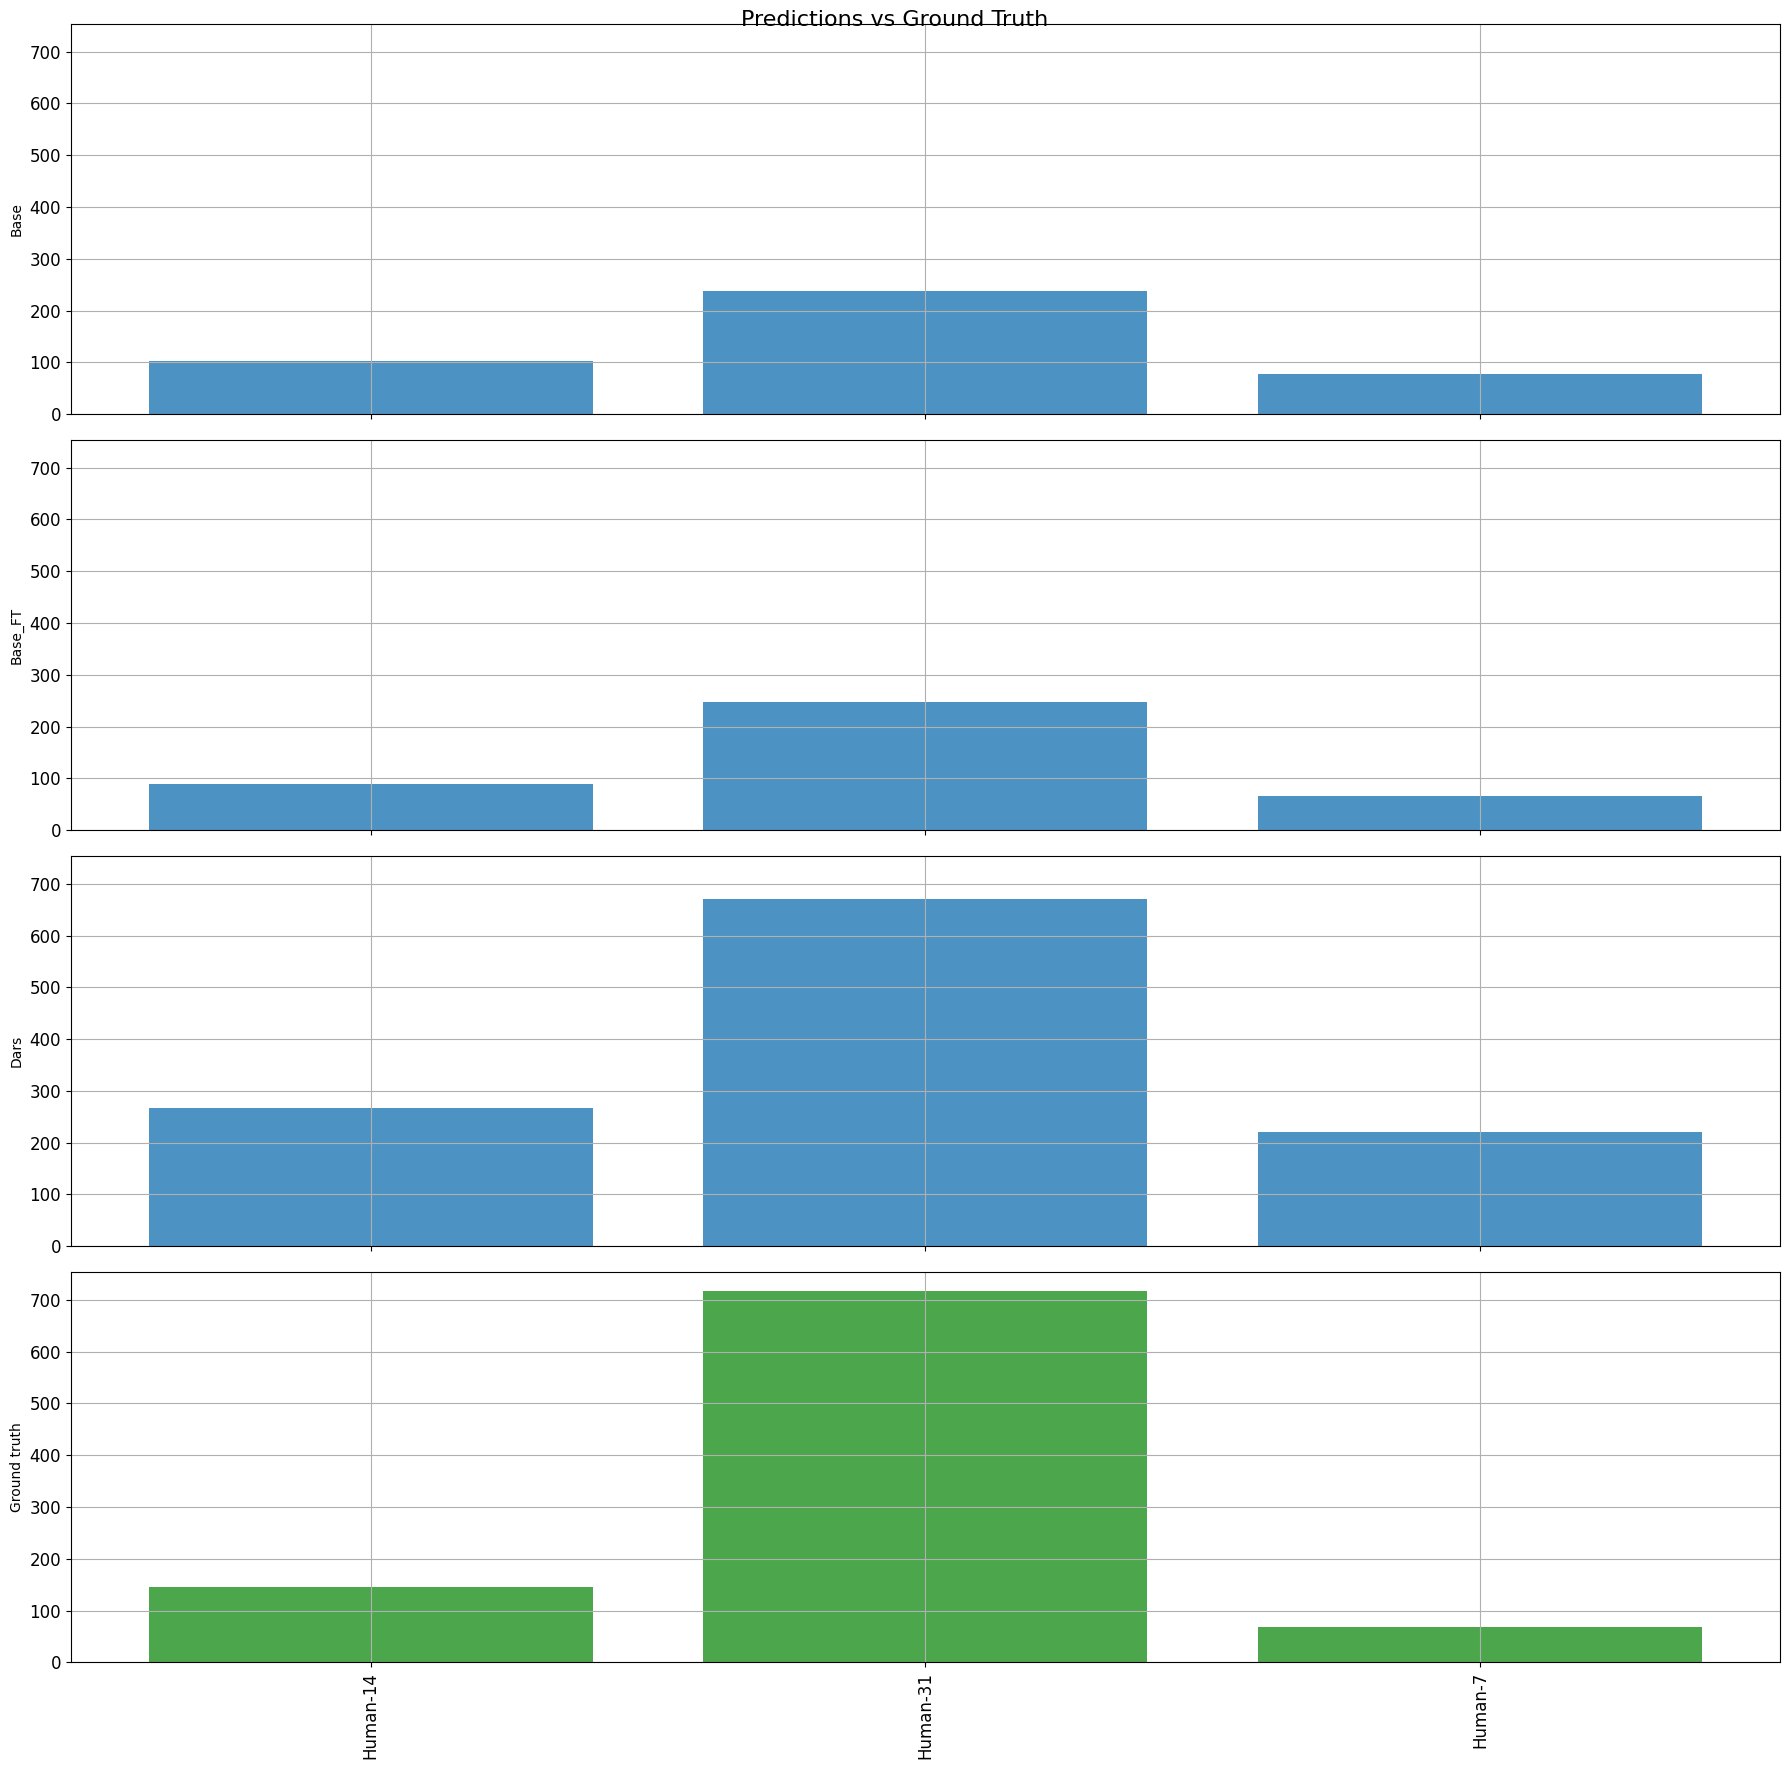

In [13]:
%matplotlib inline
# plot predictions vs ground truth for a random region in the test set defined by index
idx = 19
region = test_df.index[idx]
print(region)
chrom = region.split(':')[0]
start = int(region.split(':')[1].split('-')[0])
end=start+2114
sequence = genome.fetch(chrom, start, end)
#prediction_tl = crested.tl.predict(sequence, model_tl)
#prediction_ft = crested.tl.predict(sequence, model_ft)


#crested.pl.bar.prediction(prediction, classes=list(adata.obs_names))
#crested.pl.bar.prediction(prediction_ft, classes=list(adata.obs_names))

crested.pl.bar.region_predictions(adata, region, title="Predictions vs Ground Truth", x_label_rotation=90)

2025-08-05T13:35:15.994501-0700 INFO Plotting density scatter for all targets and predictions, models: ['Base', 'Base_FT', 'Dars'], split: test


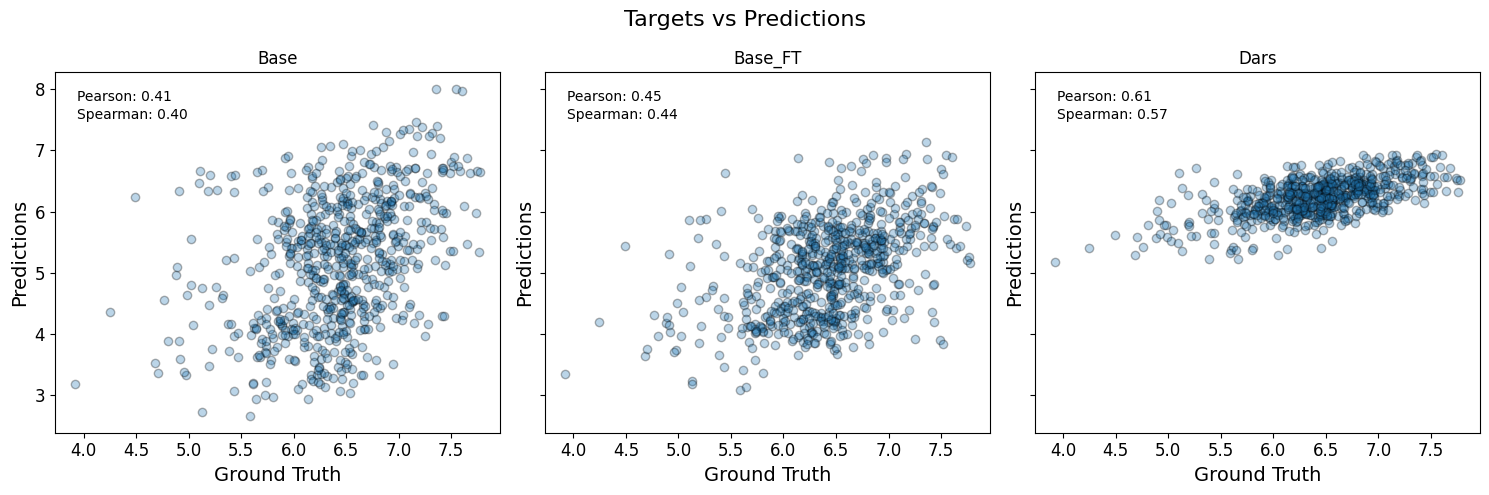

In [14]:
classn = None#"Ependymal"
crested.pl.scatter.class_density(
    adata,
    class_name=classn,
    model_names=None,
    split="test",
    log_transform=True,
    width=5*len(names),
    height=5,
    alpha=0.3,
)

2025-08-05T13:35:16.311292-0700 INFO Plotting density scatter for class: Human-31, models: ['Base', 'Base_FT', 'Dars'], split: test


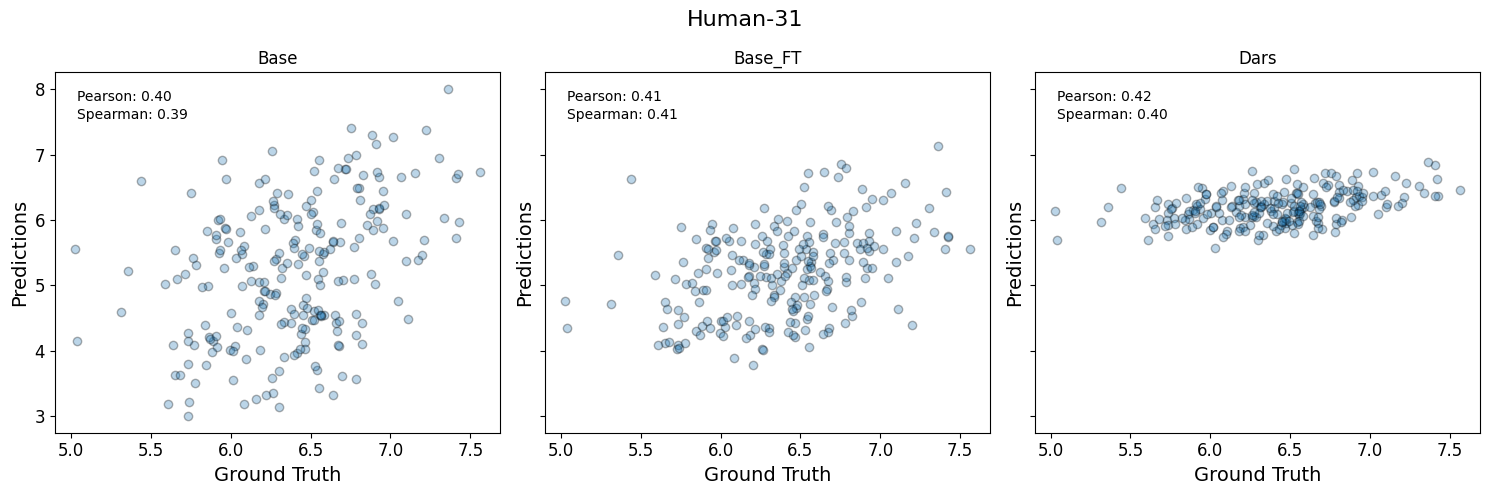

In [15]:
crested.pl.scatter.class_density(
    adata,
    class_name='Human-31',
    model_names=None,
    split="test",
    log_transform=True,
    width=5*len(names),
    height=5,
    alpha=0.3,
)

2025-08-05T13:35:16.595528-0700 INFO Plotting heatmap correlations for split: test, models: ['Base', 'Base_FT', 'Dars']


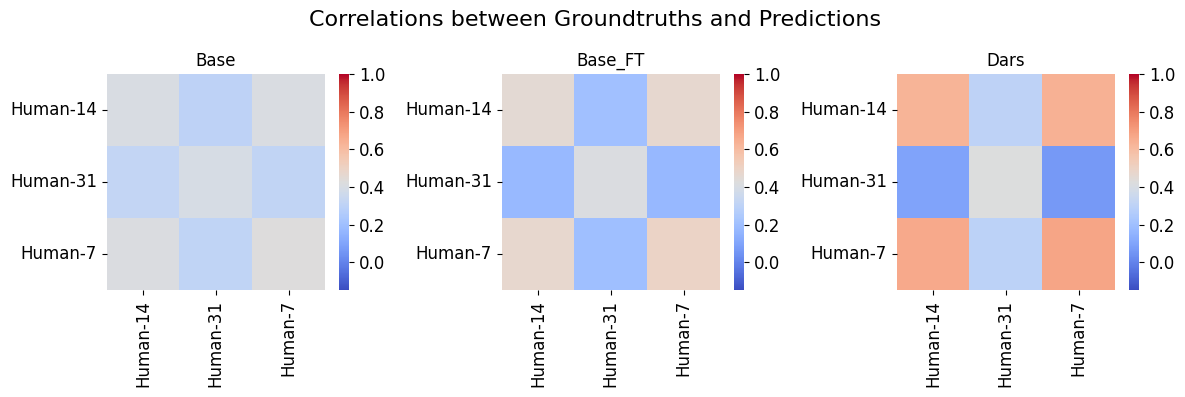

In [16]:
crested.pl.heatmap.correlations_predictions(
    adata,
    split="test",
    title="Correlations between Groundtruths and Predictions",
    x_label_rotation=90,
    width=4*len(names),
    height=4,
    log_transform=True,
    vmax=1,
    vmin=-0.15,
)

In [17]:
# plot predictions vs ground truth for a random region in the test set defined by index
region = test_df.index[idx]
classes_of_interest = ['Human-14', 'Human-31', 'Human-7']
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))
score_list = []

for model in model_list:
    scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
        region,
        target_idx=class_idx,
        model=model,
        method='integrated_grad'
    )
    score_list.append(scores)


2025-08-05T13:35:16.995918-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:08<00:00,  8.50s/it]

2025-08-05T13:35:25.499620-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).



Model: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

2025-08-05T13:35:25.745385-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).



Model: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


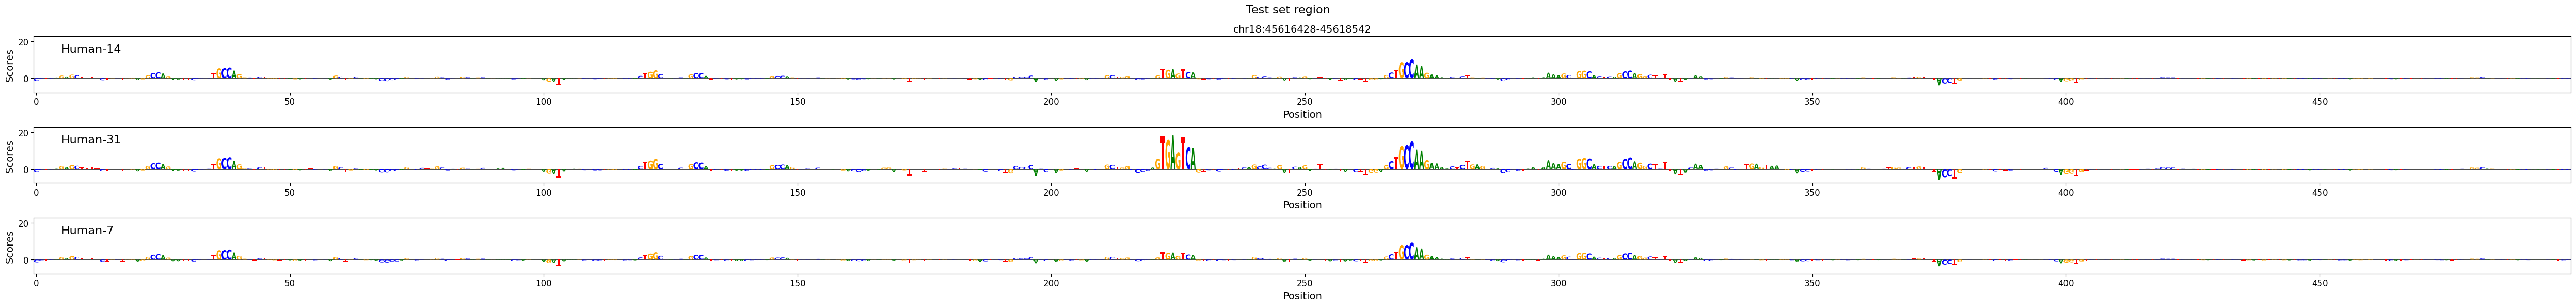

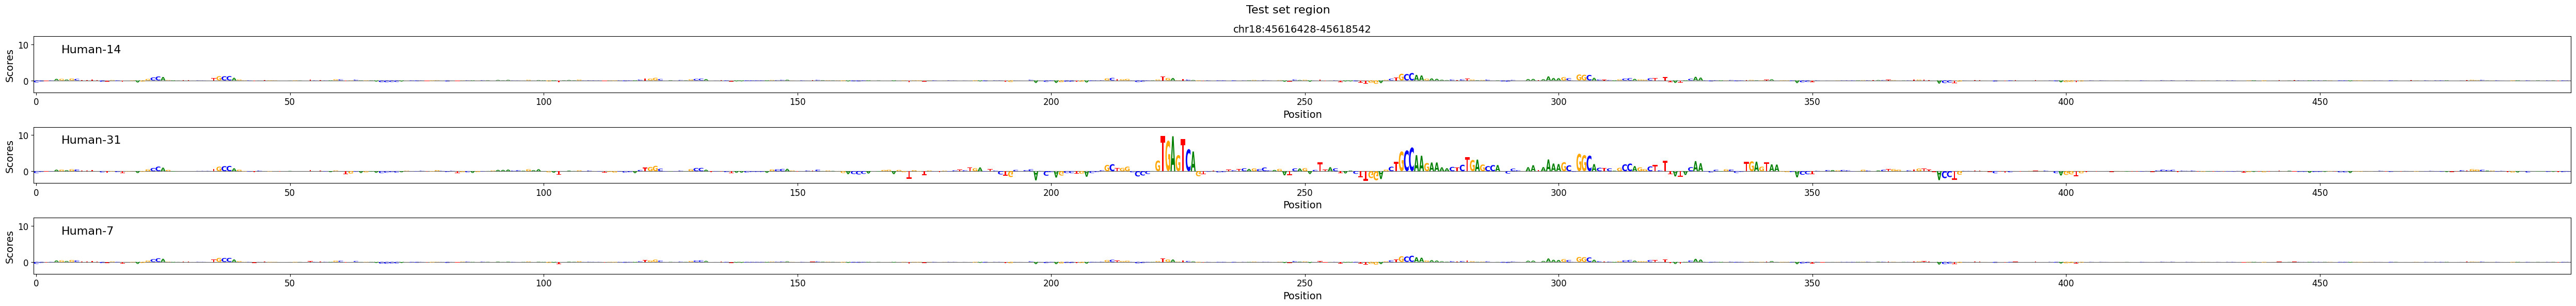

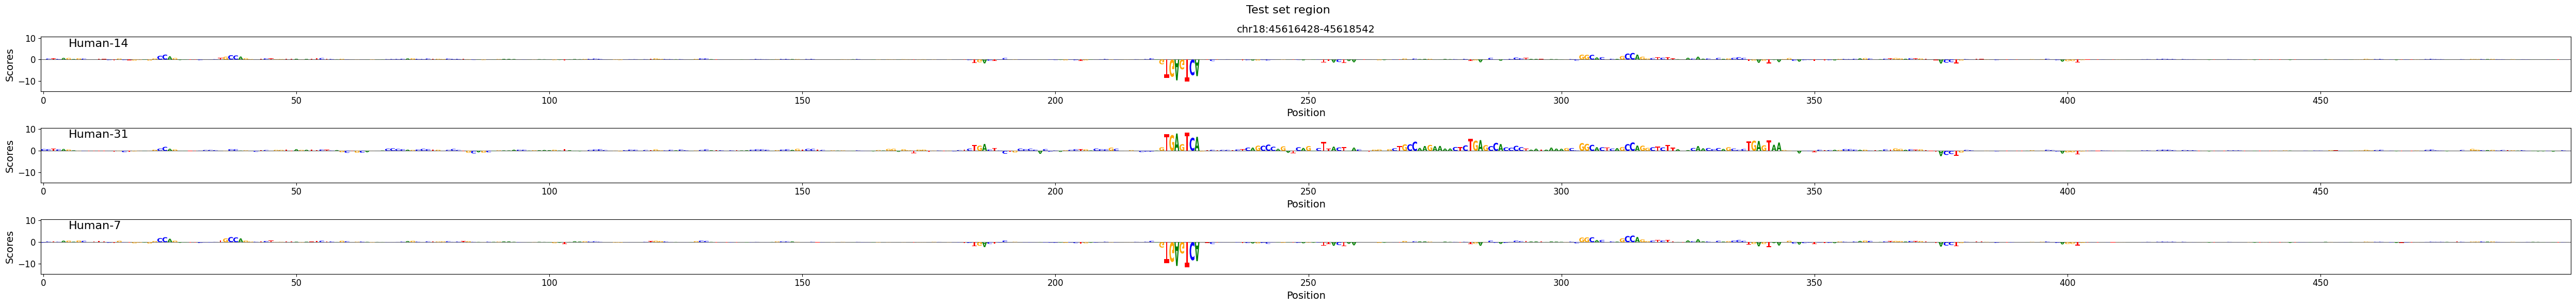

In [18]:
for scores in score_list:
    crested.pl.patterns.contribution_scores(
        scores,
        one_hot_encoded_sequences,
        sequence_labels=[region],
        class_labels=classes_of_interest,
        zoom_n_bases=500,
        title="Test set region",
    )  # zoom in on the center 500bp

In [19]:
seq = "ccaatgtcccaggtgaaaatgaacacttgcaggtttcttcttccagtcccagccctctggcccacaccccactgctgaccacaggagcctctcacagtgctcactcagggcttcaaaactctctccctggcagcttctttctattctgaagtctcccagtccagcacaaattagtcccctctcctggactcctactgcgccgccttggtacatcacagagcactggctgagaaaatcgccctttagtccccgcaaatcactctcttacctgctccactgactaggcctgtgccattatttattagggaatgagcgctagctgttgagggtcaattattccattgaccaggcattacaataattcctggtaattaaaagaggtacttatgtgaatctggatgcgtattgaaagaaacattagtccttttgtcagcttggcaagtctattgttctgagccaggcccaaccaattaacatcttttgccaatccctgtcagcaggggcttgcaaggaggagagaaaggggggccggtcagatgctaatttagatacaattgtgtcagggtgcatgggaggggtaactctgaagaagagactccagtttaatgaagcaaacagcttgggtcccagtgaccctgcaggggtaattttaaaaggcccctctgtgttcctgtgccaaattgcagagggccagcaacaagaagcccttcaaaaaaaaaaaaagagggagcaggataatcatccacttaatctgctcattaaacaaatctctcaggcggacttaacgtgaattagcacttctctgaaaggggcagccttgatgagcagcagacagctcagatcatttggaaggtcacagttttttttttattattatataagcccagttgttattaatgtattcatatttgaagaaactgagcagagacctgctttcattcaatctagtgagcaaaacagtacgttttcctaactggaaaacaaaacataaatgctaatcaggtcccagcagagatcaaatcaagctaaatatagcaggcaccctttgtggttttttttgttttgttttgttttgttttttgtttttttttaatacagaaattaaggaaagaaaaaaaaccattgaattaattgtcttcctctgtgcttcgcacctgacaccagcgaggctcacacaagggccg"
len(seq)
padding = 465
extended_seq = "N" * padding + seq + "N" * padding
print(len(extended_seq))  # Should print 2114

2114


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


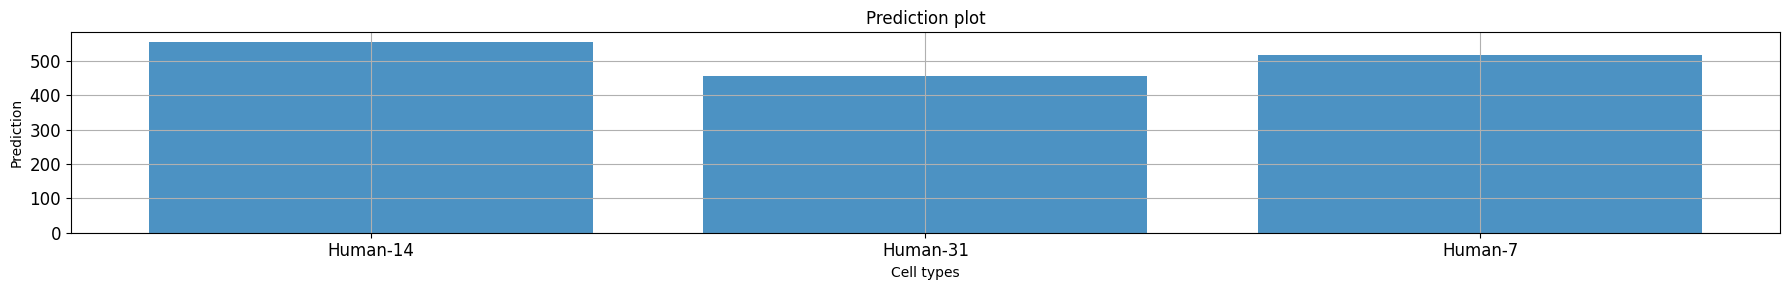

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


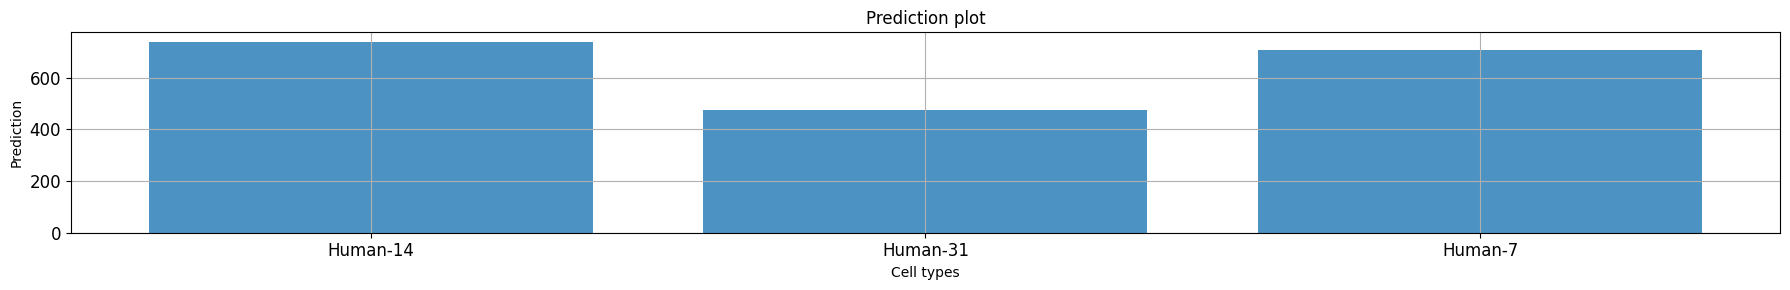

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


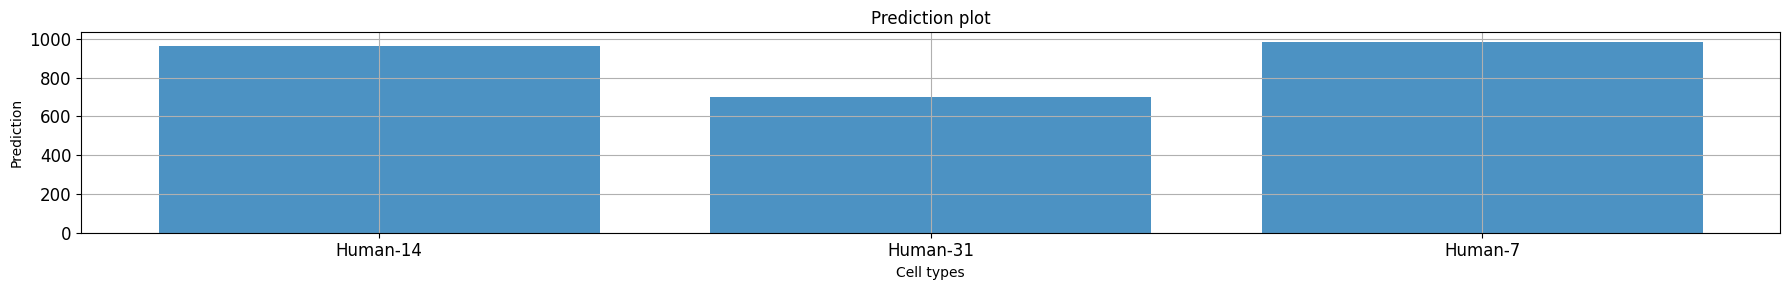

In [20]:
for model in model_list:
    prediction = crested.tl.predict(extended_seq, model)
    crested.pl.bar.prediction(prediction, classes=list(adata.obs_names))

In [21]:
# plot predictions vs ground truth for a random region in the test set defined by index
region = test_df.index[idx]
classes_of_interest = ['Human-14', 'Human-31', 'Human-7']
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))
score_list = []

for model in model_list:
    scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
        extended_seq,
        target_idx=class_idx,
        model=model,
        method='integrated_grad'
    )
    score_list.append(scores)

2025-08-05T13:36:03.888626-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

2025-08-05T13:36:04.186168-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).



Model: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

2025-08-05T13:36:04.430582-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).



Model: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


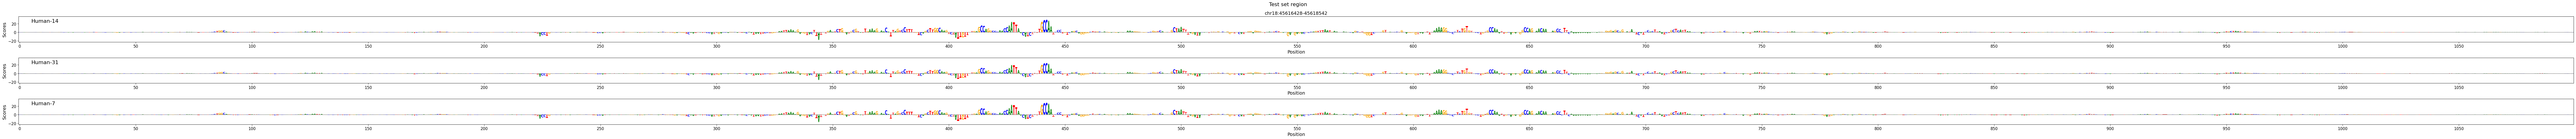

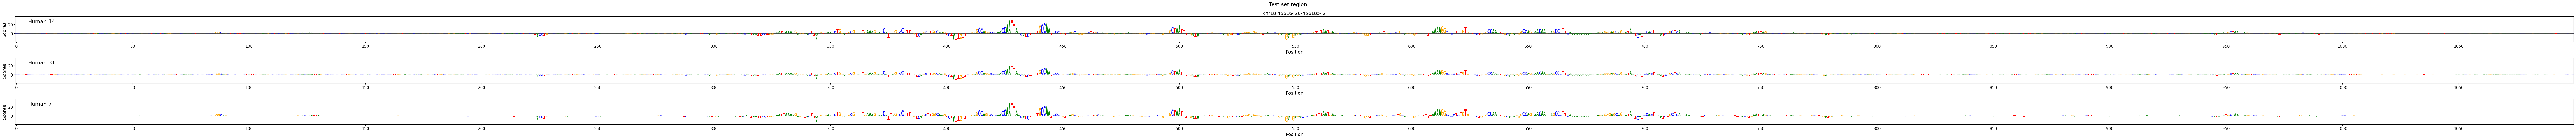

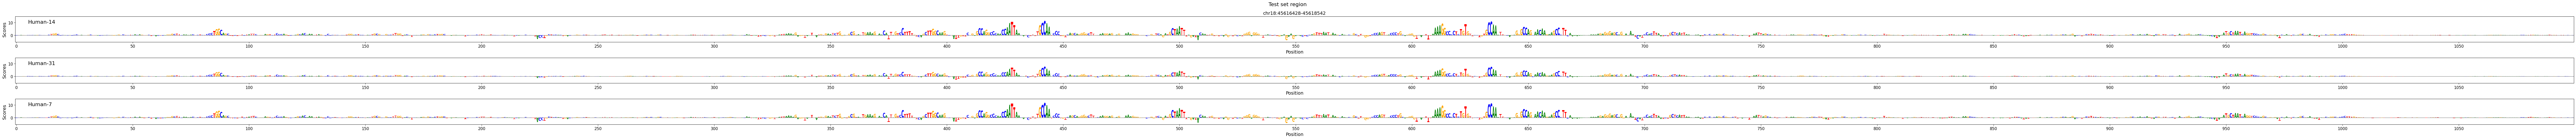

In [22]:
for scores in score_list:
    crested.pl.patterns.contribution_scores(
        scores,
        one_hot_encoded_sequences,
        sequence_labels=[region],
        class_labels=classes_of_interest,
        zoom_n_bases=1100,
        title="Test set region",
    )  # zoom in on the center 500bp

### Human liftover

In [23]:
region = "chr13:25910101-25912214"
print(region)
chrom = region.split(':')[0]
start = int(region.split(':')[1].split('-')[0])
end=start+2114
sequence = genome.fetch(chrom, start, end)

chr13:25910101-25912214


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


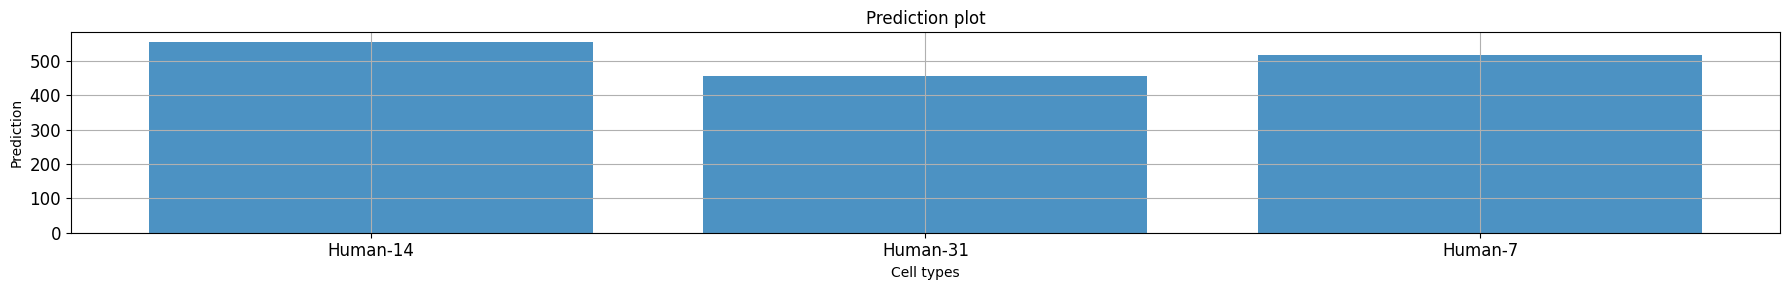

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


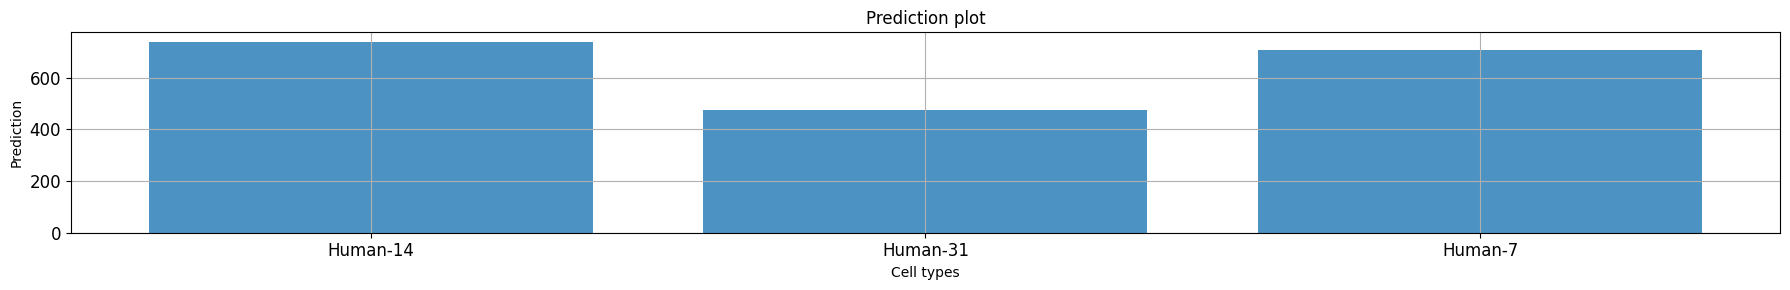

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


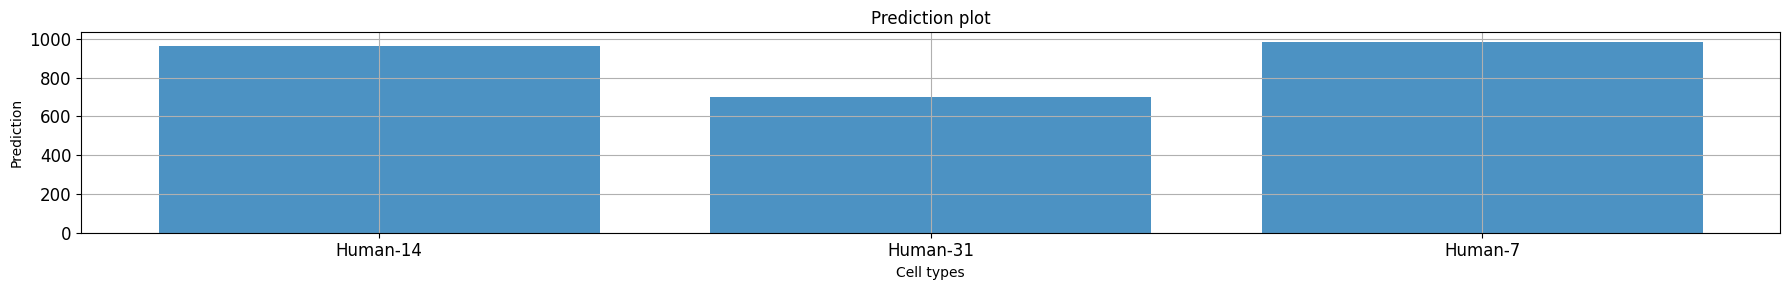

In [24]:
for model in model_list:
    prediction = crested.tl.predict(extended_seq, model)
    crested.pl.bar.prediction(prediction, classes=list(adata.obs_names))

In [25]:
# plot predictions vs ground truth for a random region in the test set defined by index
region = test_df.index[idx]
classes_of_interest = ['Human-14', 'Human-31', 'Human-7']
class_idx = list(adata.obs_names.get_indexer(classes_of_interest))
score_list = []

for model in model_list:
    scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
        extended_seq,
        target_idx=class_idx,
        model=model,
        method='integrated_grad'
    )
    score_list.append(scores)

2025-08-05T13:37:07.876011-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).


Model: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

2025-08-05T13:37:08.172191-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).



Model: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

2025-08-05T13:37:08.416793-0700 INFO Calculating contribution scores for 3 class(es) and 1 region(s).



Model: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]


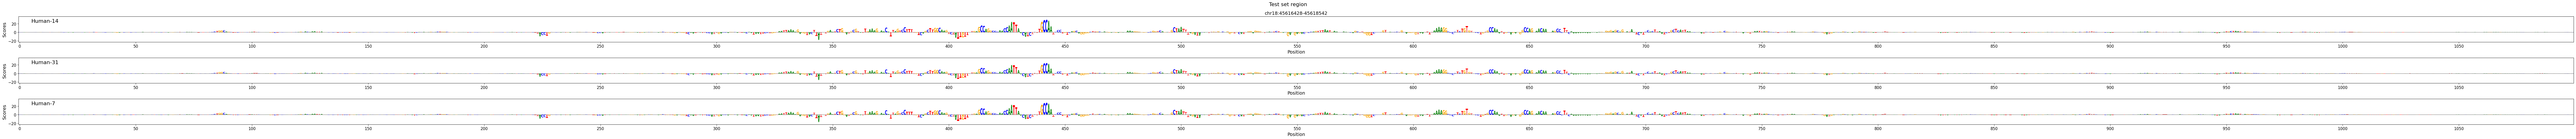

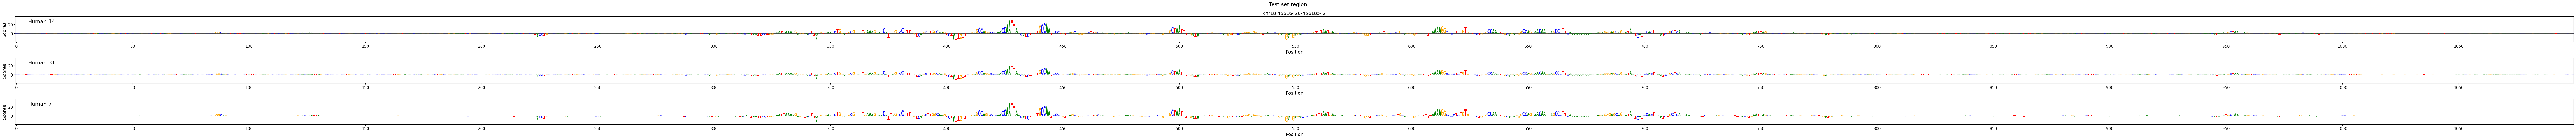

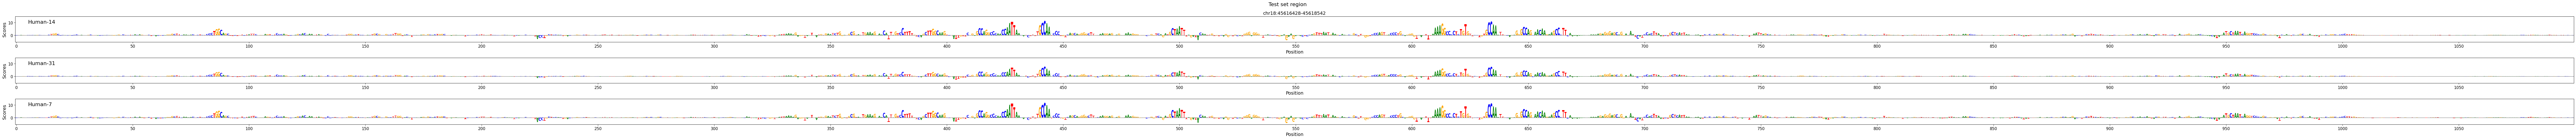

In [26]:
for scores in score_list:
    crested.pl.patterns.contribution_scores(
        scores,
        one_hot_encoded_sequences,
        sequence_labels=[region],
        class_labels=classes_of_interest,
        zoom_n_bases=1100,
        title="Test set region",
    )  # zoom in on the center 500bp